In [1]:
# import packages
import imageio
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.signal import find_peaks

In [2]:
# read in .png file
spectrogram = imageio.imread('cal.png')

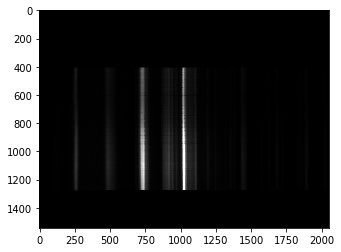

In [3]:
# plot .png file
plt.imshow(spectrogram);

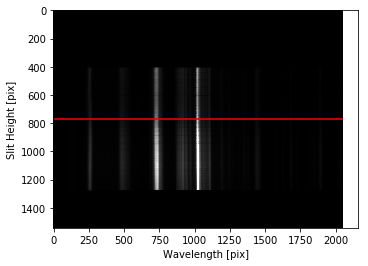

In [4]:
# select a line to plot
line = math.ceil(spectrogram.shape[0]/2+1)
plt.imshow(spectrogram)
plt.hlines(line,0,spectrogram.shape[1],'r')
plt.xlabel('Wavelength [pix]')
plt.ylabel('Slit Height [pix]');

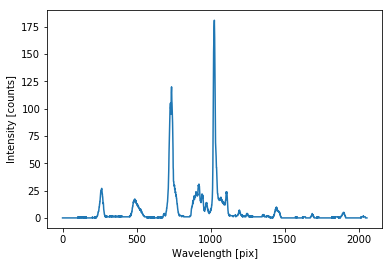

In [5]:
# make line plot, spectra, of chosen height pixel
spectrum = spectrogram[line,:,0]
plt.plot(spectrum)
plt.xlabel('Wavelength [pix]')
plt.ylabel('Intensity [counts]');

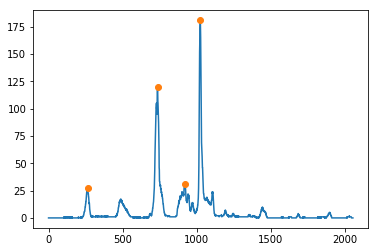

In [10]:
#find peaks
peaks,info = find_peaks(spectrum,height=25,prominence=20)
plt.plot(spectrum)
plt.plot(peaks,spectrum[peaks],'o');

In [16]:
#find peak indices
pks = info['peak_heights']
X = peaks[np.argsort(-pks)]
Y = -np.sort(-pks)
pk1 = [X[0],Y[0]]
pk2 = [X[1],Y[1]]
pk3 = [X[3],Y[3]]

In [12]:
pk1

[1025, 181.0]

In [13]:
pk2

[736, 120.0]

In [17]:
pk3

[264, 27.0]

In [18]:
#assume Ax = B
A = np.array([[pk1[0]**2,pk1[0],1], [pk2[0]**2,pk2[0],1], [pk3[0]**2,pk3[0],1]]) 
B = np.array([612, 547, 437]) # known top 3 peaks
x = np.linalg.solve(A,B) 

In [19]:
#check that the calibration worked - should match known peaks
np.dot(A,x)

array([612., 547., 437.])

In [20]:
#calculate new x-axis based on calibration
x1 = np.linspace(0,spectrogram.shape[1],spectrogram.shape[1],endpoint=False)
wavelength = x[0]*np.square(x1) + x[1]*x1 + x[2]

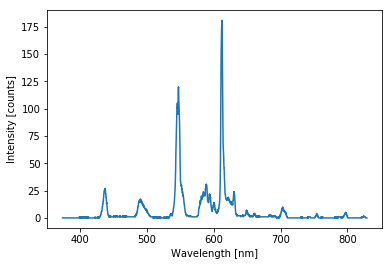

In [21]:
#plot spectrally calibrated spectrum
plt.plot(wavelength,spectrum)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [counts]');

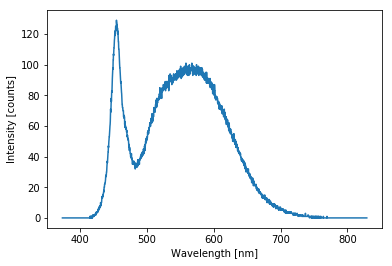

In [22]:
#plot another image from the same camera, spectrally calibrated
spectrogram2 = imageio.imread('white.png')
spectrum2 = spectrogram2[line,:,0]
plt.plot(wavelength,spectrum2)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [counts]');